In [1]:
#Import libraries
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
import seaborn as sns

In [2]:
#Read data
df_clean = pd.read_csv('overall.csv')

In [3]:
#Split data
X = df_clean['selftext']
y = df_clean['Python']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=42,
                                                    stratify=y)

In [4]:
#Applying CountVectorizer
cvec = CountVectorizer(min_df=5)
cvec.fit(X_train)
X_train_cvec = cvec.transform(X_train)
X_test_cvec = cvec.transform(X_test)

In [5]:
#Get the length
len(cvec.get_feature_names())

6116

In [6]:
#Putting data into dataframe
X_train_cv = pd.DataFrame(X_train_cvec.toarray(), columns=cvec.get_feature_names())
X_test_cv = pd.DataFrame(X_test_cvec.toarray(), columns=cvec.get_feature_names())
X_train_cv.head()

,00,000,0000,00000,001,002,01,02,03,04,...,yy,yyyy,yyyymmdd,zero,zeros,zip,zipcode,zone,zoo,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#drop numeric columns
X_train_cv = X_train_cv.drop(columns=[col for col in X_train_cv.columns if col.isnumeric()])
X_train_cv.head()

,0rc1,100k,10k,1k,1st,200k,2c,2d,2f,2nd,...,yy,yyyy,yyyymmdd,zero,zeros,zip,zipcode,zone,zoo,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
#drop numeric columns
X_test_cv = X_test_cv.drop(columns=[col for col in X_test_cv.columns if col.isnumeric()])
X_test_cv.head()

,0rc1,100k,10k,1k,1st,200k,2c,2d,2f,2nd,...,yy,yyyy,yyyymmdd,zero,zeros,zip,zipcode,zone,zoo,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
#Check if there is 'python'
X_train_cv['python']

0       0
1       0
2       0
3       0
4       6
       ..
7495    0
7496    1
7497    1
7498    0
7499    0
Name: python, Length: 7500, dtype: int64

In [10]:
#Drop 'python'
X_train_cv = X_train_cv.drop(columns = ['python'])

In [11]:
X_train_cv.head()

,0rc1,100k,10k,1k,1st,200k,2c,2d,2f,2nd,...,yy,yyyy,yyyymmdd,zero,zeros,zip,zipcode,zone,zoo,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
#Drop sql
X_train_cv = X_train_cv.drop(columns = ['sql'])

In [13]:
X_train_cv.head()

,0rc1,100k,10k,1k,1st,200k,2c,2d,2f,2nd,...,yy,yyyy,yyyymmdd,zero,zeros,zip,zipcode,zone,zoo,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
#drop python and sql
X_test_cv = X_test_cv.drop(columns = ['python'])
X_test_cv = X_test_cv.drop(columns = ['sql'])

In [15]:
X_test_cv.head()

,0rc1,100k,10k,1k,1st,200k,2c,2d,2f,2nd,...,yy,yyyy,yyyymmdd,zero,zeros,zip,zipcode,zone,zoo,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Baseline Accuracy

In [16]:
#Checking for baseline accuracy
y_train.value_counts(normalize=True)

0    0.5
1    0.5
Name: Python, dtype: float64

# Logistic Regression

In [17]:
lr = LogisticRegression(penalty='l2')

lr.fit(X_train_cv, y_train)
lr.score(X_train_cv, y_train), lr.score(X_test_cv, y_test)

C:\Users\ANNITAN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.9897333333333334, 0.9216)

In [18]:
#Overfit

In [19]:
print(f'Logistic Regression Intercept: {lr.intercept_}')
print(f'Logistic Regression Coefficient: {lr.coef_}')

Logistic Regression Intercept: [0.25590592]
Logistic Regression Coefficient: [[ 0.00751227 -0.02383156  0.10767927 ... -0.10282618 -0.14835495
   0.31368509]]


In [20]:
#How many coefficients are there
lr.coef_.shape

(1, 5876)

In [21]:
X_train_cv

,0rc1,100k,10k,1k,1st,200k,2c,2d,2f,2nd,...,yy,yyyy,yyyymmdd,zero,zeros,zip,zipcode,zone,zoo,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
# Check out coefficients
coef = pd.Series(lr.coef_[0], index = X_train_cv.columns)
coef

0rc1       0.007512
100k      -0.023832
10k        0.107679
1k        -0.016622
1st       -0.157336
             ...   
zip        0.035774
zipcode   -0.001977
zone      -0.102826
zoo       -0.148355
zoom       0.313685
Length: 5876, dtype: float64

In [23]:
# Check out coefficients
coef1 = pd.Series(np.exp(lr.coef_[0]), index = X_train_cv.columns)
coef1

0rc1       1.007541
100k       0.976450
10k        1.113690
1k         0.983516
1st        0.854417
             ...   
zip        1.036422
zipcode    0.998025
zone       0.902284
zoo        0.862125
zoom       1.368459
Length: 5876, dtype: float64

In [24]:
coefficients = pd.DataFrame(data=coef1, index=None, columns=None, dtype=None, copy=None)
coefficients

,0
0rc1,1.007541
100k,0.976450
10k,1.113690
1k,0.983516
1st,0.854417
...,...
zip,1.036422
zipcode,0.998025
zone,0.902284
zoo,0.862125


In [25]:
coefficients.rename(columns={0:'Coefficients'}, inplace=True)


In [26]:
coefficients.sort_values(by = 'Coefficients', ascending = False)

,Coefficients
thread,5.090441
pandas,4.607804
automate,3.775485
def,3.540431
text,3.505633
...,...
database,0.173148
snippets,0.173029
select,0.148223
query,0.113452


In [27]:
coefficients.sort_values(by = 'Coefficients', ascending = True)

,Coefficients
queries,0.100162
query,0.113452
select,0.148223
snippets,0.173029
database,0.173148
...,...
text,3.505633
def,3.540431
automate,3.775485
pandas,4.607804


In [35]:
# Import metrics.
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, plot_roc_curve, roc_auc_score, recall_score, precision_score, f1_score

preds = lr.predict(X_test_cv)


In [36]:

confusion_matrix(y_test, # True values.
                 preds)  # Predicted values.

array([[1147,  103],
       [  93, 1157]], dtype=int64)

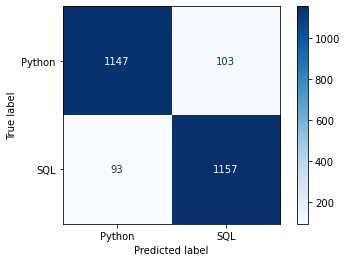

In [40]:
plot_confusion_matrix(lr, X_test_cv, y_test, cmap='Blues', 
                      values_format='d', display_labels=['Python', 'SQL']);

# Random Forests and Extra Trees

In [27]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [28]:
rf = RandomForestClassifier(n_estimators=10)

et = ExtraTreesClassifier(n_estimators=10)

In [29]:
#Score for RandomForestClassifier
cross_val_score(rf, X_train_cv, y_train, cv=5).mean()

0.8869333333333331

In [30]:
#Score for ExtraTreesClassifier
cross_val_score(et, X_train_cv, y_train, cv=5).mean()

0.8694666666666666

In [31]:
rf = RandomForestClassifier(random_state=42)

rf_params = {
    'n_estimators': [10, 20, 50, 100],
    'max_depth': [None, 3, 4, 5],
    'max_features': ['auto', 100, 200, 300, 4, 5, 50]
}

gs = GridSearchCV(rf, param_grid=rf_params, cv=5)
gs.fit(X_train_cv, y_train)
print(gs.best_score_)
gs.best_params_

0.9124000000000001


{'max_depth': None, 'max_features': 100, 'n_estimators': 100}

In [32]:
gs.score(X_test_cv, y_test)

0.9128

In [33]:
et = ExtraTreesClassifier(random_state=42)

et_params = {
    'n_estimators': [10, 20, 50, 100],
    'max_depth': [None, 3, 4, 5],
    'max_features': ['auto', 100, 200, 300, 4, 5, 50]
}

gs = GridSearchCV(et, param_grid=et_params, cv=5)
gs.fit(X_train_cv, y_train)
print(gs.best_score_)
gs.best_params_

0.9137333333333333


{'max_depth': None, 'max_features': 300, 'n_estimators': 100}

In [34]:
gs.score(X_test_cv, y_test)

0.9164

# Support Vector Machines


In [35]:
from sklearn import svm

In [36]:
svc = svm.SVC()

svc_params = {
    'kernel': ['rbf','linear','poly','sigmoid'],
    'C': [1.0, 0.5, 2.0, 5.0]
}

gs = GridSearchCV(svc, param_grid=svc_params, cv=5)
gs.fit(X_train_cv, y_train)
print(gs.best_score_)

gs.score(X_train_cv, y_train), gs.score(X_test_cv, y_test)

0.9177333333333333


(0.9616, 0.922)

In [37]:
gs.best_params_

{'C': 5.0, 'kernel': 'rbf'}

In [38]:
gs.best_estimator_

SVC(C=5.0)